# State-Value Function

In [77]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
grid_size = 5
initial_state = np.array([0,0])
loc_a = np.array([4,1])
loc_a_ = np.array([0,1])
rew_a = 10
loc_b = np.array([4,3])
loc_b_ = np.array([2,3])
rew_b = 5

In [122]:

def next_state(state, action):
    if state[0] == loc_a[0] and state[1] == loc_a[1]:
                    return loc_a_, rew_a
    elif state[0] == loc_b[0] and state[1] == loc_b[1]:
                    return loc_b_, rew_b
    else:
        if action == 'N':
            if state[0] == grid_size - 1:
                return state, -1
            else:
                state = state + np.array([1,0])
                return state, 0
        if action == 'S':
            if state[0] == 0:
                return state, -1
            else:
                state = state + np.array([-1,0])
                return state, 0
        if action == 'W':
            if state[1] == 0:
                return state, -1
            else:
                state = state + np.array([0,-1])
                return state, 0
        if action == 'E':
            if state[1] == grid_size-1:
                return state, -1
            else:
                state = state + np.array([0,1])
                return state, 0
        


def compute_state_val_function(max_iterations, eps):
    val_function = np.zeros((max_iterations, grid_size,grid_size))
    change = np.zeros(max_iterations)
    actions = ['N','S','W','E']
    iteration = 0
    gamma = 0.9
    change[0] = 10
    while iteration <= max_iterations:
        for i in range(grid_size):
            for j in range(grid_size):
                value = 0 
                for action in actions:
                    astate, arew = next_state(np.array([i,j]),action)
                    value += 0.25 * (arew + gamma * val_function[iteration,astate[0],astate[1]])
                val_function[iteration+1,i,j] = value
        change[iteration] = abs(np.sum(val_function[iteration]-val_function[iteration+1]))
        if change[iteration] < eps: 
            break
        iteration += 1
    return val_function[:iteration+1,:,:], change[:iteration+1]



In [123]:
grid_size = 5
initial_state = np.array([0,0])
loc_a = np.array([4,1])
loc_a_ = np.array([0,1])
rew_a = 10
loc_b = np.array([4,3])
loc_b_ = np.array([2,3])
rew_b = 5
epsilon = 1*10e-16
max_iterations = 1000000
val_func, change= compute_state_val_function(max_iterations, epsilon)
print(val_func[-1])

[[-1.85770055 -1.34523126 -1.22926726 -1.42291815 -1.97517905]
 [-0.9735923  -0.43549543 -0.35488227 -0.58560509 -1.18307508]
 [ 0.05082249  0.73817059  0.67311326  0.35818621 -0.40314114]
 [ 1.52158807  2.99231786  2.25013995  1.9075717   0.54740271]
 [ 3.30899634  8.78929186  4.42761918  5.32236759  1.49217876]]


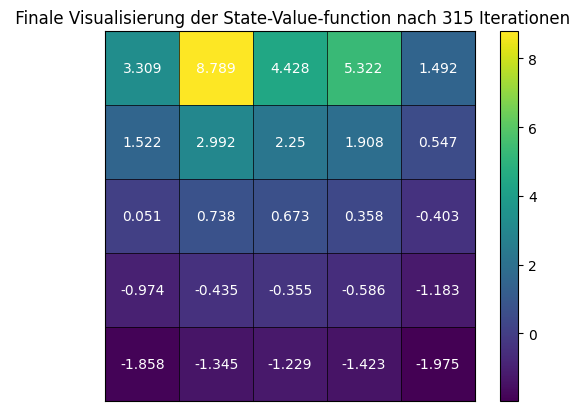

In [124]:
# Beispiel einer 5x5-Matrix
matrix = np.round(val_func[-1],3)

# Erstelle die Grafik
fig, ax = plt.subplots()

# Zeige die Matrix als Bild
cax = ax.imshow(matrix, cmap='viridis', origin='lower')

# Füge Text für jeden Wert in das Raster
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='white')

# Zeige die Farbskala und das Raster
plt.colorbar(cax)
plt.grid(visible=True, color='black', linestyle='-', linewidth=0.5)

# Anpassung der Achsen
ax.set_xticks(np.arange(-0.5, 5, 1))
ax.set_yticks(np.arange(-0.5, 5, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title(f" Finale Visualisierung der State-Value-function nach {np.size(val_func,axis=0)} Iterationen")
ax.tick_params(length=0)  # Entfernt die kleinen Ticks auf den Achsen

# Rasterlinien aktivieren
plt.grid(True)
plt.show()


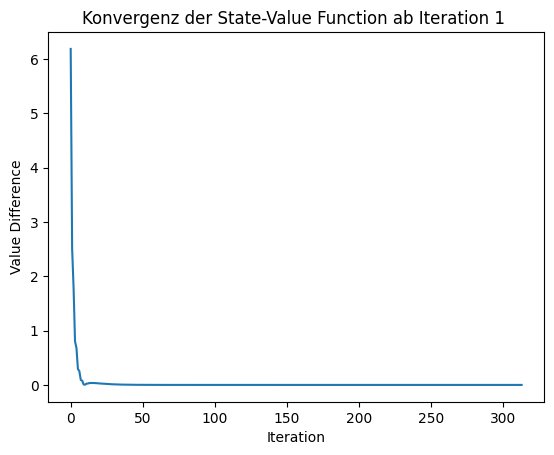

In [125]:
# Visualization of the convergence of the Value function
plt.plot(change[1:])
plt.xlabel('Iteration')
plt.ylabel('Value Difference')
plt.title('Konvergenz der State-Value Function ab Iteration 1 ')
plt.show()

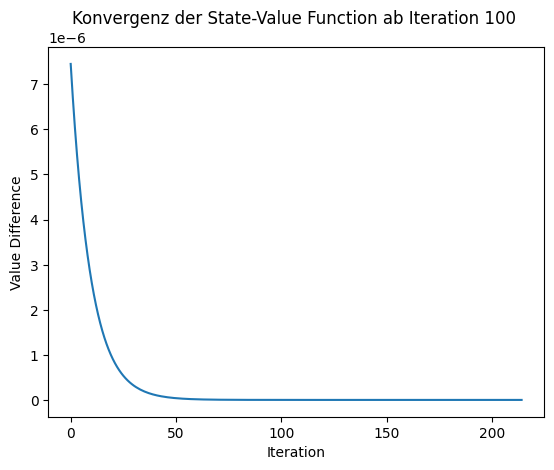

In [126]:
# Visualization of the convergence of the Action Value function
plt.plot(change[100:])
plt.xlabel('Iteration')
plt.ylabel('Value Difference')
plt.title('Konvergenz der State-Value Function ab Iteration 100 ')
plt.show()

# Action Value Function 

In [127]:
def compute_action_val_function(max_iter, eps):
    val_function = np.zeros((max_iter, grid_size,grid_size, 4))
    change = np.zeros(max_iterations)
    actions = ['N','S','E','W']
    iteration = 0
    gamma = 0.9
    change[0] = 10
    while iteration <= max_iterations:
        for i in range(grid_size):
            for j in range(grid_size):
                for action_index, action in enumerate(actions):
                    astate, arew = next_state(np.array([i,j]),action)
                    value = arew + gamma * 0.25  * np.sum(val_function[iteration,astate[0],astate[1],:])
                    val_function[iteration+1,i,j,action_index] = value
        change[iteration] = abs(np.sum(val_function[iteration]-val_function[iteration+1]))
        if change[iteration] < eps: 
            break
        iteration += 1
    return val_function[:iteration,:,:], change[:iteration]


In [128]:
grid_size = 5
initial_state = np.array([0,0])
loc_a = np.array([4,1])
loc_a_ = np.array([0,1])
rew_a = 10
loc_b = np.array([4,3])
loc_b_ = np.array([2,3])
rew_b = 5
epsilon = 1e-14
max_iterations = 1000000
val_func, change= compute_action_val_function(max_iterations, epsilon)

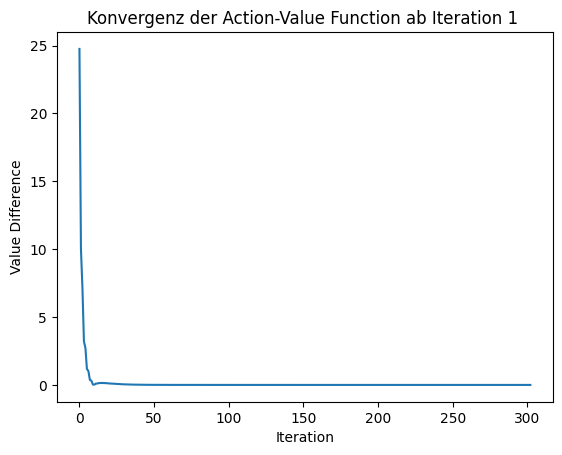

In [129]:
# Visualization of the convergence of the Value function
plt.plot(change[1:])
plt.xlabel('Iteration')
plt.ylabel('Value Difference')
plt.title('Konvergenz der Action-Value Function ab Iteration 1 ')
plt.show()

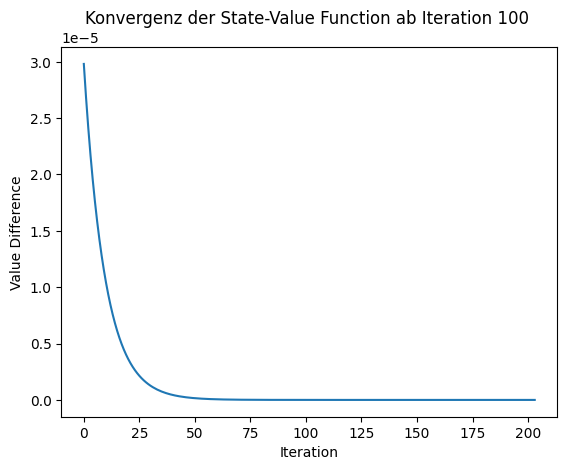

In [130]:
# Visualization of the convergence of the Action Value function
plt.plot(change[100:])
plt.xlabel('Iteration')
plt.ylabel('Value Difference')
plt.title('Konvergenz der State-Value Function ab Iteration 100 ')
plt.show()

In [131]:
# Final Action Value Function Q(s, a)
print("Final Action Value Function Q(s, a):")
for i in range(grid_size):
    for j in range(grid_size):
        print(f"Q({i}, {j}) =", val_func[-1, i, j, :])

Final Action Value Function Q(s, a):
Q(0, 0) = [-0.87623307 -2.6719305  -1.21070814 -2.6719305 ]
Q(0, 1) = [-0.39194589 -2.21070814 -1.10634054 -1.6719305 ]
Q(0, 2) = [-0.31939404 -2.10634054 -1.28062633 -1.21070814]
Q(0, 3) = [-0.52704458 -2.28062633 -1.77766114 -1.10634054]
Q(0, 4) = [-1.06476757 -2.77766114 -2.77766114 -1.28062633]
Q(1, 0) = [ 0.04574024 -1.6719305  -0.39194589 -1.87623307]
Q(1, 1) = [ 0.66435353 -1.21070814 -0.31939404 -0.87623307]
Q(1, 2) = [ 0.60580193 -1.10634054 -0.52704458 -0.39194589]
Q(1, 3) = [ 0.32236759 -1.28062633 -1.06476757 -0.31939404]
Q(1, 4) = [-0.36282703 -1.77766114 -2.06476757 -0.52704458]
Q(2, 0) = [ 1.36942926 -0.87623307  0.66435353 -0.95425976]
Q(2, 1) = [ 2.69308607 -0.39194589  0.60580193  0.04574024]
Q(2, 2) = [ 2.02512596 -0.31939404  0.32236759  0.66435353]
Q(2, 3) = [ 1.71681453 -0.52704458 -0.36282703  0.60580193]
Q(2, 4) = [ 0.49266244 -1.06476757 -1.36282703  0.32236759]
Q(3, 0) = [2.9780967  0.04574024 2.69308607 0.36942926]
Q(3, 1)